In [1]:
import numpy as np 
import matplotlib.pyplot as plt 
import scipy as scp

# **Quadratic Splines**

In [2]:
def quad_splines(x, y):
    n = len(x)
    A = np.zeros([3 * n - 4, 3 * n - 4])
    Y = np.zeros(3 * n - 4)
    for i in range(2):
        A[i, 0] = x[i]
        A[i, 1] = 1
    j = 0
    for i in range(2, 2 * n - 2, 2):
        k = int(i/2)
        A[i, j + 2] = x[k] ** 2
        A[i + 1, j + 2] = x[k + 1] ** 2
        A[i, j + 3] = x[k]
        A[i + 1, j + 3] = x[k + 1]
        A[i, j + 4] = 1
        A[i + 1, j + 4] = 1
        j = j + 3
    A[2 * n - 2, 0] = 1
    A[2 * n - 2, 1] = -2 * x[1]
    A[2 * n - 2, 3] = -1
    m, l = 0, 2
    for i in range(2 * n - 1, 3 * n - 4):
        A[i, m + 2] = 2 * x[l]
        A[i, m + 3] = 1
        A[i, m + 5] = -2 * x[l]
        A[i, m + 6] = -1
        m = m + 3
        l = l + 1
    Y[0] = y[0]
    Y[1] = y[1]
    for i in range(2, 2 * n - 2):
        if i % 2 == 0:
            k = int(i/2)
        else:
            k = int(i/2) + 1
        Y[i] = y[k]
    C = np.linalg.solve(A, Y)
    return C

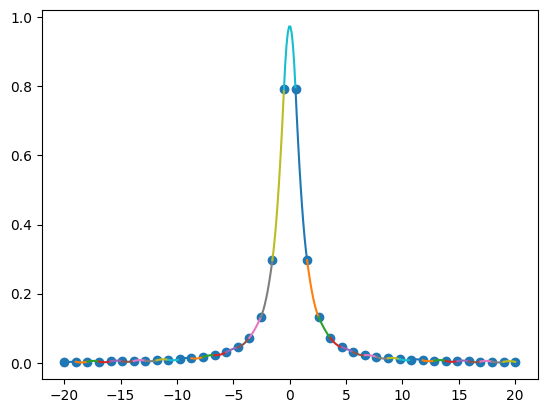

In [3]:
x = np.linspace(-20, 20, 40)
y = 1 / (x**2 + 1)
plt.scatter(x, y)
C = quad_splines(x, y)
x0 = np.linspace(x[0], x[1], 20)
p0 = C[0] * x0 + C[1]
plt.plot(x0, p0)
j = 1
for i in range(2, len(C), 3):
    xs = np.linspace(x[j], x[j+1], 10)
    ps = C[i] * xs ** 2 + C[i + 1] * xs + C[i + 2]
    plt.plot(xs, ps)
    j = j + 1
plt.show()


# **Cubic Splines**

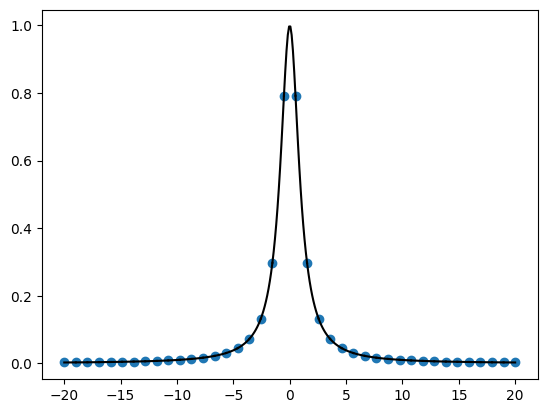

In [5]:
x = np.linspace(-20, 20, 40)
y = 1 / (x**2 + 1)
plt.scatter(x, y)
for i in range(len(x) - 1):
    xs = np.linspace(x[i], x[i + 1], 10)
    ys = 1 / (xs ** 2 + 1)
    P = scp.interpolate.CubicSpline(xs, ys)
    plt.plot(xs, P(xs), color = 'k')
plt.show()
